# Regression, classification and clasterization 

Importing libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans

Dataset loading

In [30]:
phones = pd.read_csv("phones.csv")

In [31]:
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


Data visualization

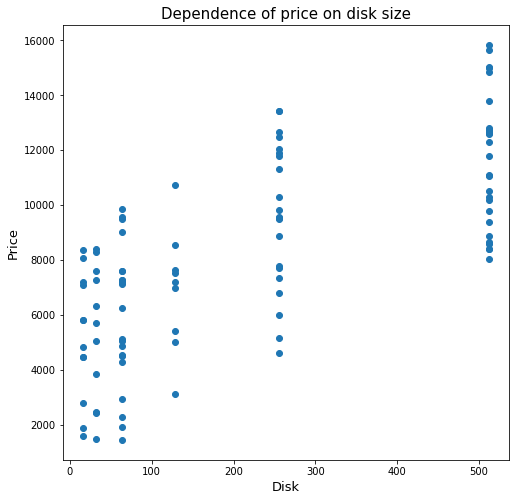

In [32]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(phones["disk"], phones["price"])
plt.xlabel("Disk", size = 13)
plt.ylabel("Price", size = 13)
plt.title("Dependence of price on disk size", size = 15)
plt.show()

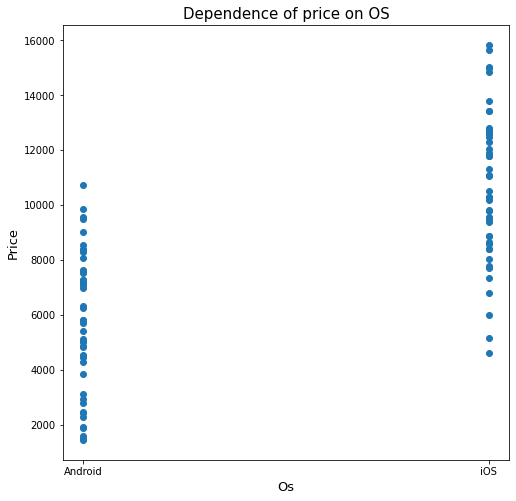

In [33]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(phones["os"], phones["price"])
plt.xlabel("Os", size = 13)
plt.ylabel("Price", size = 13)
plt.title("Dependence of price on OS", size = 15)
plt.show()

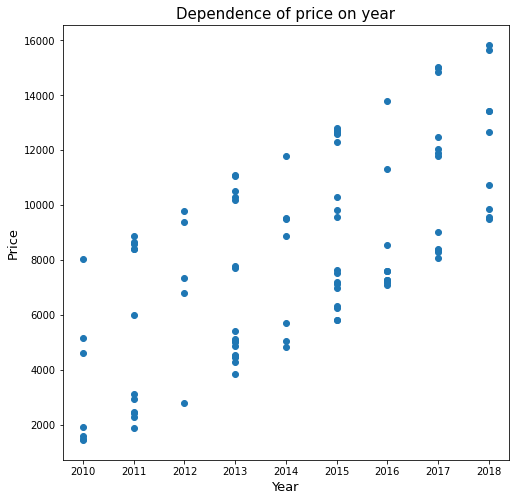

In [34]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.scatter(phones["year"], phones["price"])
plt.xlabel("Year", size = 13)
plt.ylabel("Price", size = 13)
plt.title("Dependence of price on year", size = 15)
plt.show()

REGRESSION

Price prediction based on year and disk size

In [35]:
X = phones[["disk","year"]]
y = phones["price"]

In [36]:
regression = LinearRegression().fit(X,y)

In [37]:
a1,a2 = regression.coef_
print(a1,a2)

13.578776616562966 1021.2761652841648


In [38]:
b = regression.intercept_
b

-2051913.7442219171

In [39]:
def regression_prediction(disk, year):
    return a1*disk + a2*year + b

In [40]:
regression_prediction(X.disk[2], X.year[2])

1720.3897027140483

Price prediction based only on disk size

In [41]:
X = phones[["disk"]]
y = phones["price"]
regression = LinearRegression().fit(X,y)
[a1] = regression.coef_
b = regression.intercept_
def regression_prediction(disk):
    return a1*disk + b
regression_prediction(X.disk[0])

6120.265447090668

Price prediction based only on year

In [42]:
X = phones[["year"]]
y = phones["price"]
regression = LinearRegression().fit(X,y)
[a1] = regression.coef_
b = regression.intercept_
def regression_prediction(year):
    return a1*year + b
regression_prediction(X.year[0])

9838.83475733595

CLASSIFICATION

In [44]:
X = phones[["disk","price"]]
y = phones["os"]

In [45]:
classification = DecisionTreeClassifier().fit(X,y)
print(export_text(classification))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [46]:
classification.predict(X[0:1])[0], y[0]

('Android', 'Android')

Model training

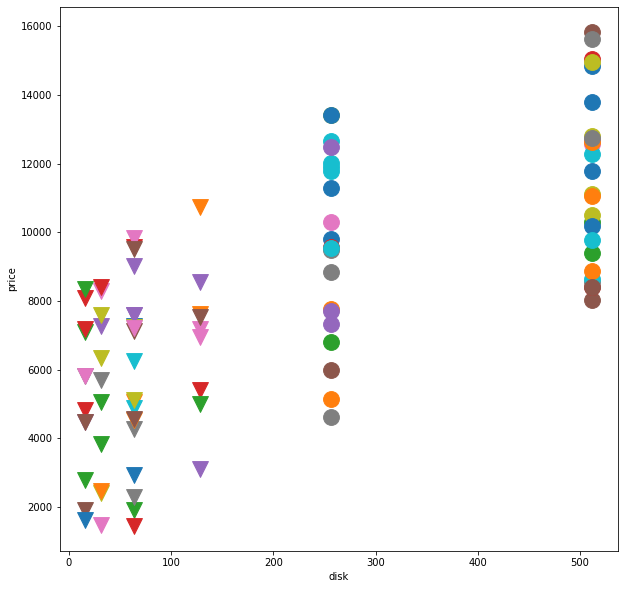

In [86]:
fig = plt.figure(figsize=(10,10))
markers = {"Android":"v", "iOS":"o"}
for d,o,p in zip(phones.disk, phones.os, phones.price):
    plt.scatter(d,p,s=250,marker = markers[o])
plt.xlabel("disk")
plt.ylabel("price")
plt.show()

CLUSTERIZATION

In [47]:
X = phones[["disk", "price"]]

In [48]:
clusterization = KMeans(n_clusters = 2).fit(X)

In [49]:
[c1,c2] = clusterization.cluster_centers_

In [50]:
clusterization.cluster_centers_

array([[  368.        , 11601.65      ],
       [  116.8       ,  5784.78333333]])

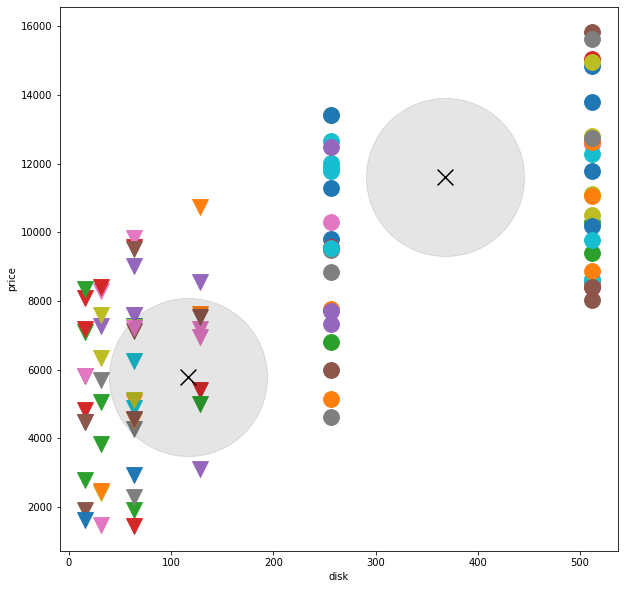

In [51]:
fig = plt.figure(figsize=(10,10))
markers = {"Android":"v", "iOS":"o"}
for d,o,p in zip(phones.disk, phones.os, phones.price):
    plt.scatter(d,p,s=250,marker = markers[o])
plt.scatter(c1[0], c1[1], s=250, marker = "x", c = "black")
plt.scatter(c1[0], c1[1], s=250*1e2, c = "black", alpha = 0.1)
plt.scatter(c2[0], c2[1], s=250, marker = "x", c = "black")
plt.scatter(c2[0], c2[1], s=250*1e2, c = "black", alpha = 0.1)
plt.xlabel("disk")
plt.ylabel("price")
plt.show()